<a href="https://colab.research.google.com/github/datchkh/stock_predictor_app/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [3]:
stock = "NVDA"
nvidia_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
nvidia_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-29,4.36950,4.38675,4.28175,4.37050,4.345416,248160000
2019-07-30,4.32375,4.39850,4.30925,4.38625,4.361075,197772000
2019-07-31,4.35450,4.35550,4.17550,4.21800,4.193790,359416000
2019-08-01,4.22850,4.31950,4.07050,4.12300,4.099336,421212000
2019-08-02,4.02975,4.09950,3.98200,4.02975,4.006621,428348000


In [5]:
nvidia_data.shape

(1258, 6)

In [6]:
nvidia_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,27.724836,28.234940,27.174597,27.733132,27.710801,4.534565e+08
std,26.924152,27.391091,26.340022,26.886840,26.893282,1.859820e+08
min,3.747500,3.790750,3.684750,3.719250,3.697904,9.788400e+07
25%,12.787625,12.976438,12.568312,12.720813,12.686009,3.202840e+08
50%,17.945126,18.253500,17.677375,18.033375,18.006967,4.276075e+08
75%,30.813749,31.323750,29.895500,30.526000,30.505295,5.513095e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09


In [7]:
nvidia_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-07-29 to 2024-07-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [8]:
nvidia_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#Closing Price of nvidia Data (below)

Text(0.5, 1.0, 'Closing Price of nvidia Data')

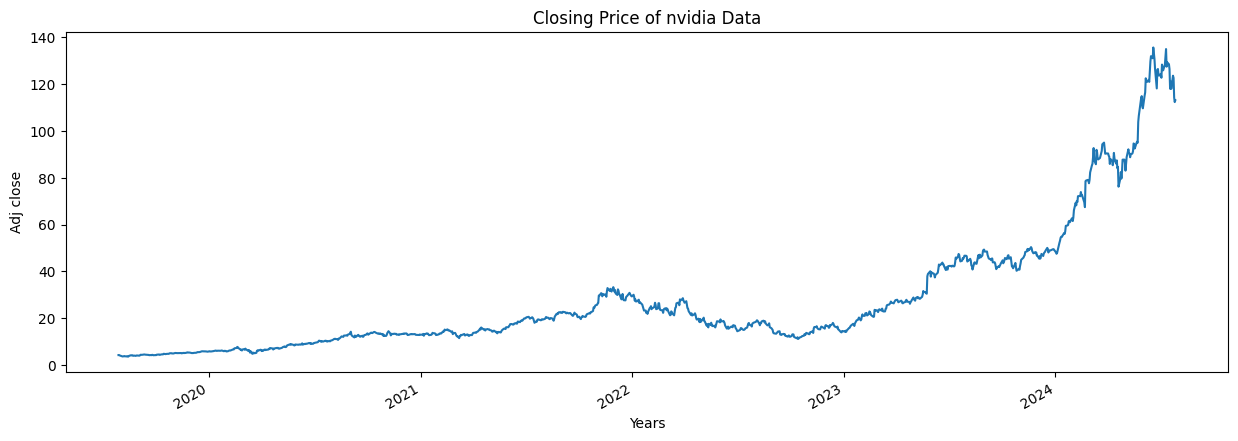

In [10]:
plt.figure(figsize = (15,5))
nvidia_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj close")
plt.title("Closing Price of nvidia Data")

#Everything About nvidia Data (below)
I plot everything that is available about nvidia Data. We iterate through every column in nvidia Data columns and label and title graphs logically.



In [11]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot()
  plt.xlabel("Years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Nvidia data")

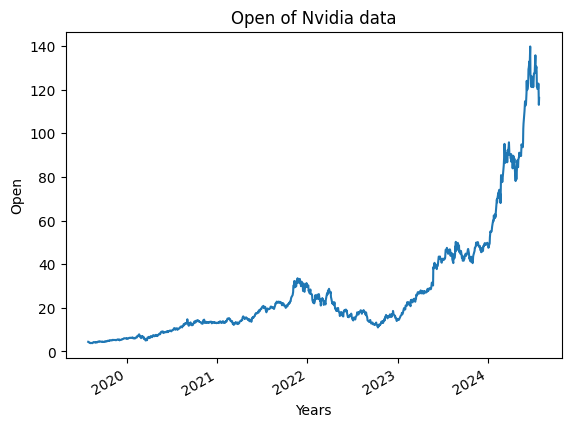

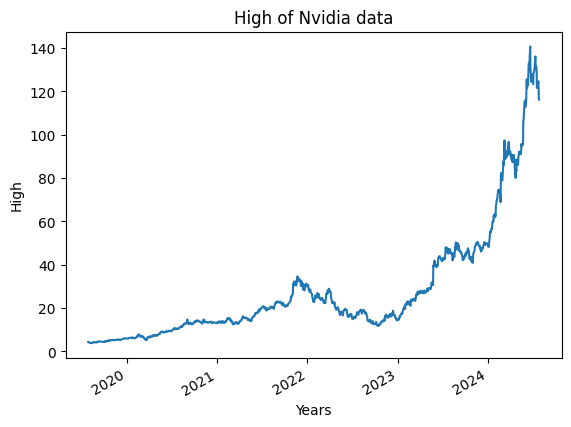

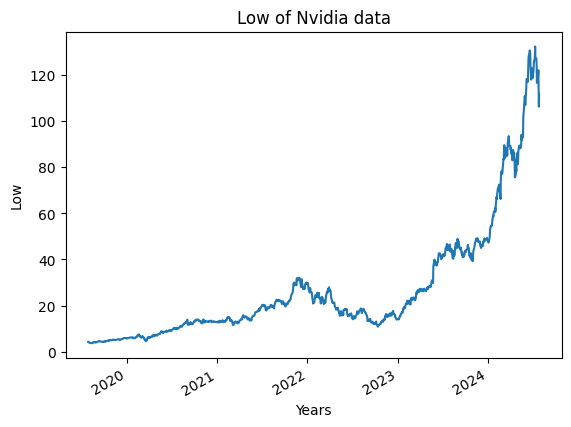

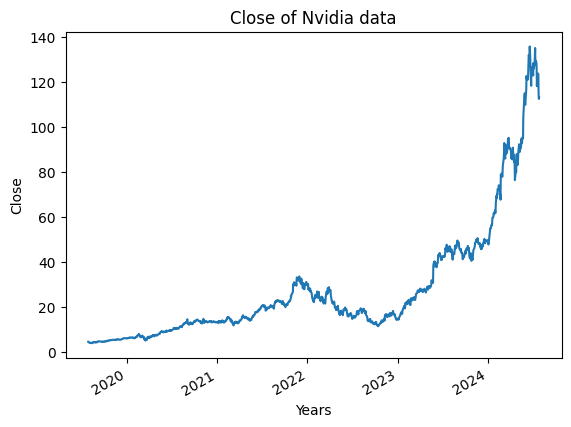

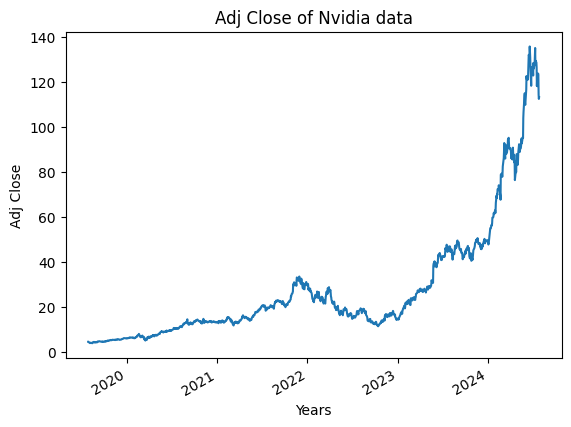

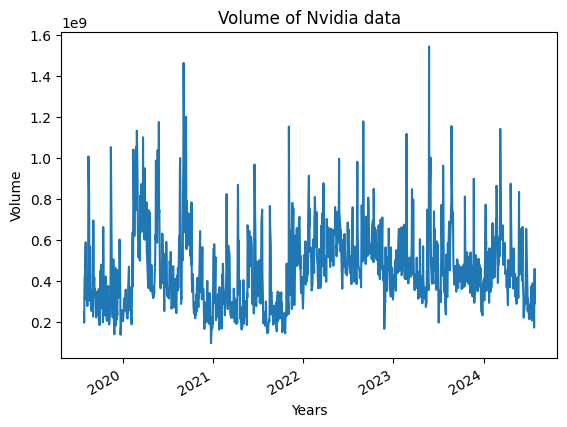

In [12]:
for column in nvidia_data.columns:
  plot_graph((15,5), nvidia_data[column], column)

#Moving Average (MA) Concept (below)
Check [this link](https://en.wikipedia.org/wiki/Moving_average) to learn about the concept

In [13]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [14]:
data = data.rolling(5).mean()
data

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [15]:
for i in range(2019, 2024):
  print(i, list(nvidia_data.index.year).count(i))

2019 109
2020 253
2021 252
2022 251
2023 250


#MA For 250 Days

In [16]:
nvidia_data['MA_for_250_days'] = nvidia_data['Adj Close'].rolling(250).mean()

In [17]:
nvidia_data['MA_for_250_days'][0:250].tail()

Date
2020-07-17         NaN
2020-07-20         NaN
2020-07-21         NaN
2020-07-22         NaN
2020-07-23    6.319458
Name: MA_for_250_days, dtype: float64

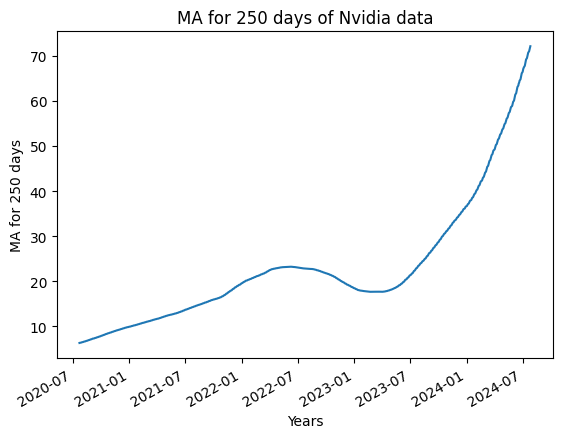

In [18]:
plot_graph((15, 5), nvidia_data['MA_for_250_days'], 'MA for 250 days')

<Figure size 640x480 with 0 Axes>

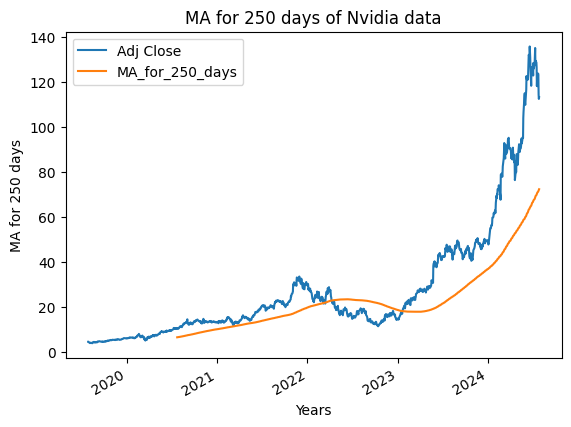

In [19]:
plot_graph((15, 5), nvidia_data[['Adj Close', 'MA_for_250_days']], 'MA for 250 days')

#MA For 100 Days

<Figure size 640x480 with 0 Axes>

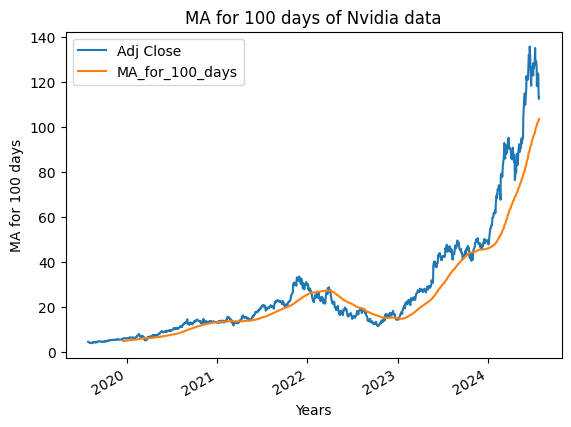

In [20]:
nvidia_data['MA_for_100_days'] = nvidia_data['Adj Close'].rolling(100).mean()
plot_graph((15, 5), nvidia_data[['Adj Close', 'MA_for_100_days']], 'MA for 100 days')

#MA For Both, 100 and 250 Days

<Figure size 640x480 with 0 Axes>

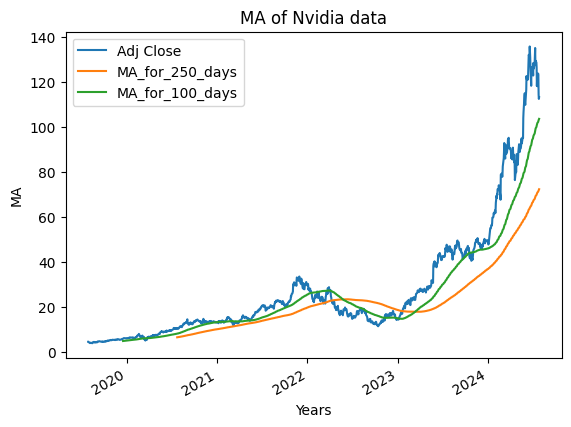

In [21]:
plot_graph((15, 5), nvidia_data[['Adj Close', 'MA_for_250_days', 'MA_for_100_days']], 'MA')

#Percentage Changes Per Day

In [22]:
nvidia_data['percentage_change_cp'] = nvidia_data['Adj Close'].pct_change()
nvidia_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2019-07-29,4.345416,NaN
2019-07-30,4.361075,0.003604
2019-07-31,4.193790,-0.038359
2019-08-01,4.099336,-0.022522
2019-08-02,4.006621,-0.022617


<Figure size 640x480 with 0 Axes>

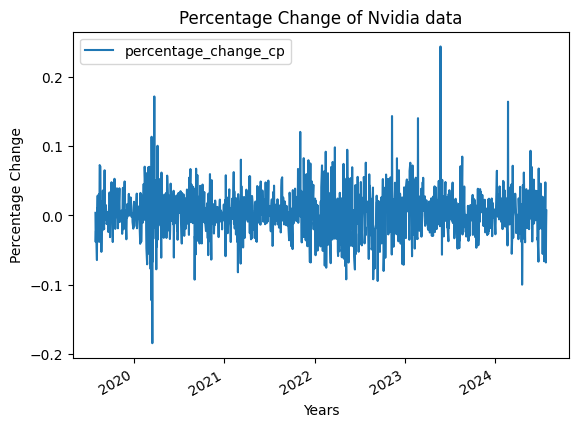

In [23]:
plot_graph((15, 5), nvidia_data[['percentage_change_cp']], 'Percentage Change')

#PreProcessing the Data

In [24]:
Adj_close_price = nvidia_data[['Adj Close']]

In [25]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([135.58000183]), array([3.69790363]))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00490978],
       [0.00502852],
       [0.00376007],
       ...,
       [0.83826462],
       [0.82332702],
       [0.82924139]])

In [27]:
len(scaled_data)

1258

#Taking Previous Data to Train

In [28]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [29]:
x_data[0], y_data[0]

(array([[0.00490978],
        [0.00502852],
        [0.00376007],
        [0.00304387],
        [0.00234086],
        [0.00038072],
        [0.00067474],
        [0.00096499],
        [0.00178863],
        [0.00101965],
        [0.00050511],
        [0.0013721 ],
        [0.00024502],
        [0.        ],
        [0.00203365],
        [0.00414833],
        [0.00359987],
        [0.00423315],
        [0.00428027],
        [0.00257646],
        [0.00314377],
        [0.00245583],
        [0.00237659],
        [0.00346707],
        [0.00356328],
        [0.00293315],
        [0.0037991 ],
        [0.00587061],
        [0.00566496],
        [0.00601399],
        [0.0065196 ],
        [0.00673657],
        [0.00672524],
        [0.00628567],
        [0.00595928],
        [0.00612153],
        [0.00591589],
        [0.00534236],
        [0.00454054],
        [0.00494616],
        [0.00451036],
        [0.00558573],
        [0.00541782],
        [0.00436509],
        [0.00480089],
        [0

70% of Data as Training Data

In [30]:
int(len(x_data)*0.7)

810

In [31]:
1258 - 100 - int(len(x_data)*0.7)

348

#Testing

In [32]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(810, 100, 1)
(810, 1)
(348, 100, 1)
(348, 100, 1)


#Training With Neural Network Model (LSTM Used)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [37]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
810/810 [==============================] - 85s 100ms/step - loss: 2.6309e-04
Epoch 2/2
810/810 [==============================] - 68s 83ms/step - loss: 1.0805e-04


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Predictions

In [39]:
predictions = model.predict(x_test)

11/11 [==============================] - 1s 50ms/step


In [40]:
predictions

array([[0.1566566 ],
       [0.15658198],
       [0.15525492],
       [0.1535677 ],
       [0.15383603],
       [0.15526831],
       [0.15917982],
       [0.16383277],
       [0.16821945],
       [0.17206976],
       [0.17527238],
       [0.17863454],
       [0.18061493],
       [0.18103272],
       [0.18031709],
       [0.18006656],
       [0.18068841],
       [0.1822348 ],
       [0.18422347],
       [0.18517533],
       [0.1844838 ],
       [0.18338002],
       [0.18317117],
       [0.1827427 ],
       [0.18119434],
       [0.1793836 ],
       [0.17831056],
       [0.1782366 ],
       [0.17980334],
       [0.18232466],
       [0.18346137],
       [0.18374799],
       [0.18341433],
       [0.18148811],
       [0.1803495 ],
       [0.18023832],
       [0.18152203],
       [0.1851703 ],
       [0.18807362],
       [0.18937509],
       [0.18921342],
       [0.19018462],
       [0.19222358],
       [0.19336845],
       [0.19435884],
       [0.1945202 ],
       [0.19382142],
       [0.193

In [41]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 24.358105],
       [ 24.348265],
       [ 24.173248],
       [ 23.950735],
       [ 23.986122],
       [ 24.175014],
       [ 24.690872],
       [ 25.304514],
       [ 25.883038],
       [ 26.390825],
       [ 26.813192],
       [ 27.256601],
       [ 27.51778 ],
       [ 27.572878],
       [ 27.4785  ],
       [ 27.44546 ],
       [ 27.527472],
       [ 27.731411],
       [ 27.993683],
       [ 28.119215],
       [ 28.028015],
       [ 27.882446],
       [ 27.854902],
       [ 27.798395],
       [ 27.594193],
       [ 27.35539 ],
       [ 27.213875],
       [ 27.20412 ],
       [ 27.410746],
       [ 27.743263],
       [ 27.893175],
       [ 27.930975],
       [ 27.88697 ],
       [ 27.632936],
       [ 27.482775],
       [ 27.468113],
       [ 27.63741 ],
       [ 28.118551],
       [ 28.501448],
       [ 28.673088],
       [ 28.651768],
       [ 28.779852],
       [ 29.048754],
       [ 29.199741],
       [ 29.330357],
       [ 29.351637],
       [ 29.25948 ],
       [ 29.2

In [42]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 23.42656326],
       [ 22.95574951],
       [ 22.95674896],
       [ 24.05330849],
       [ 24.21824265],
       [ 25.53071404],
       [ 25.71463966],
       [ 25.88956642],
       [ 26.18844986],
       [ 26.45734024],
       [ 27.18004799],
       [ 26.76821327],
       [ 26.52031517],
       [ 26.39936447],
       [ 26.97312927],
       [ 27.37197113],
       [ 27.76581192],
       [ 27.95373535],
       [ 27.44194221],
       [ 26.87017441],
       [ 27.0261116 ],
       [ 27.56789398],
       [ 27.15805817],
       [ 26.48432922],
       [ 26.45234108],
       [ 26.7472229 ],
       [ 26.99112701],
       [ 27.65585709],
       [ 27.91975212],
       [ 27.09308243],
       [ 27.108078  ],
       [ 27.03110886],
       [ 26.23043251],
       [ 26.94514465],
       [ 27.21503258],
       [ 27.73782539],
       [ 28.89835548],
       [ 28.19863892],
       [ 27.790802  ],
       [ 27.55089951],
       [ 28.66844749],
       [ 29.13925743],
       [ 28.5594902 ],
       [ 28

#Accuracy
Accuracy isn't very good, but we can increase it by adding more data from previous years. In the beginning, change "end.year-5" to "end.year-(something higher than 5)" if we want a better accuracy. But I will leave this as it is for now.

In [43]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [44]:
rmse

3.0671387165024933

Plotting Accuracy

In [45]:
plotting_data = pd.DataFrame (
    {'original_test_data': inv_y_test.reshape(-1),
    'Predictions': inv_predictions.reshape(-1)},
    index = nvidia_data.index[splitting_len + 100:]
)
plotting_data.head()

,original_test_data,Predictions
Date,,
2023-03-09,23.426563,24.358105
2023-03-10,22.955750,24.348265
2023-03-13,22.956749,24.173248
2023-03-14,24.053308,23.950735
2023-03-15,24.218243,23.986122


<Figure size 640x480 with 0 Axes>

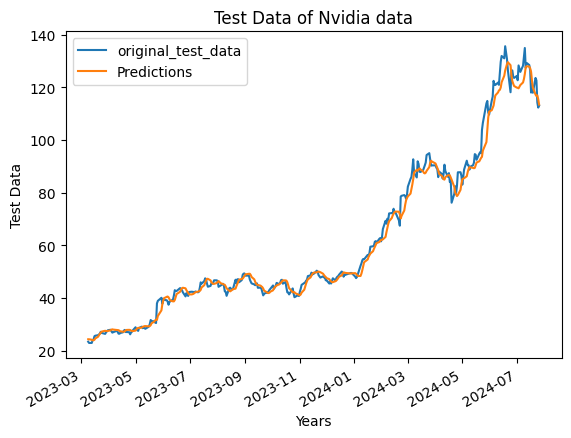

In [46]:
plot_graph((15, 6), plotting_data, 'Test Data')

<Figure size 640x480 with 0 Axes>

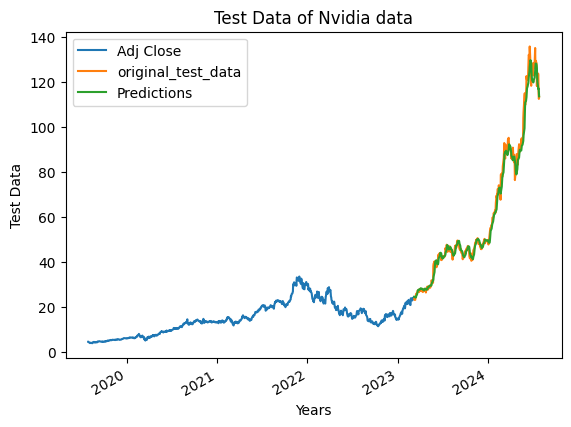

In [47]:
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data]), 'Test Data')

In [50]:
model.save('/content/drive/MyDrive/1_Trained_Models/stock_predictor.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
